In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

In [3]:
from sklearn import ensemble as ens
from sklearn import metrics as met
from sklearn import linear_model as lin
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [29]:
data = np.genfromtxt('perc3.txt')
ring = pd.read_csv('ring.csv',header=None)

In [6]:
data[:3]

array([[ 0.     ,  2.33869,  2.70684],
       [ 0.     ,  2.00634,  2.7129 ],
       [ 0.     ,  2.30877,  2.77452]])

In [8]:
data.shape

(400, 3)

In [9]:
ring.head(3)

0         1  2
0  0.165279  0.294722  0
1  0.059541  0.333946  0
2 -0.280749  0.184689  0

In [10]:
ring.shape

(12500, 3)

In [5]:
print(data)
print(ring.head())
x_ring = ring.values[:,:2]
y_ring = ring.values[:,2]

          0         1  2
0  0.165279  0.294722  0
1  0.059541  0.333946  0
2 -0.280749  0.184689  0
3  0.326673  0.086425  0
4  0.286781 -0.180726  0


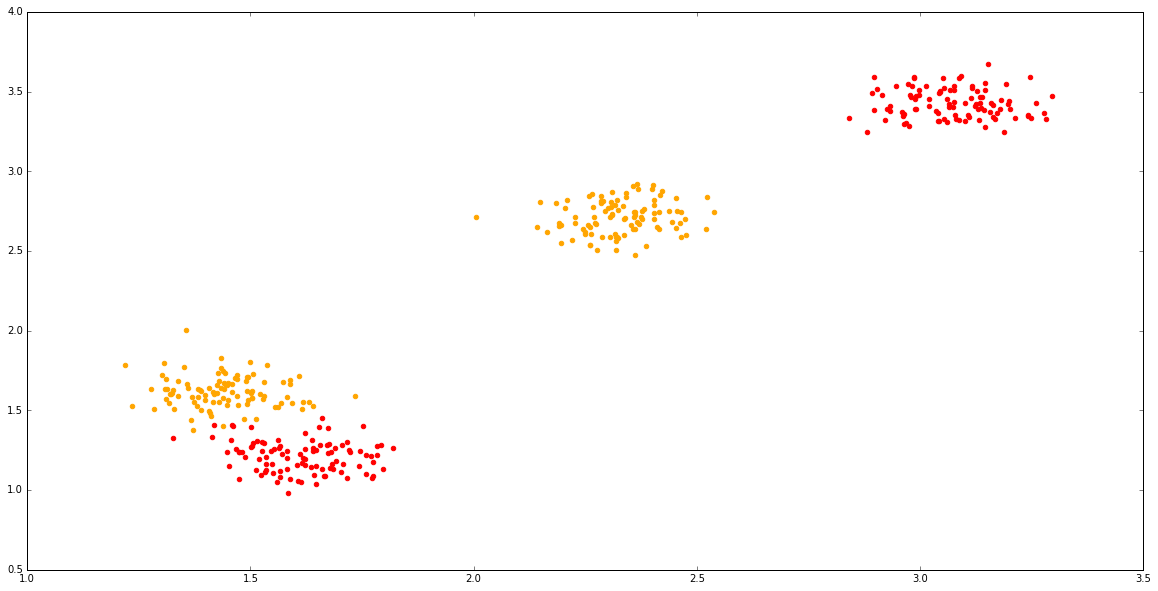

In [30]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(data[data[:,0]==0][:,1],data[data[:,0]==0][:,2],color='red')
plt.scatter(data[data[:,0]==1][:,1],data[data[:,0]==1][:,2],color='orange')

In [12]:
data.shape

(400, 3)

In [32]:
tr_size=200

idx = np.random.permutation(len(data))

train = data[idx[:tr_size]]
test = data[idx[tr_size:]]

In [35]:
cf = lin.LogisticRegression(solver='newton-cg')
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

0.958495849585


In [41]:
cf.coef_

array([[-5.13664043,  3.17061762]])

In [34]:
cf = SVC(kernel='linear',cache_size=30000,probability=False,gamma=1,degree=2)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

cf = SVC(kernel='rbf',cache_size=30000,probability=False,gamma=1,degree=2)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

0.966896689669
1.0


In [20]:
x_ring.shape

(12500, 2)

In [21]:
tr_size=5000

idx = np.random.permutation(len(x_ring))

x_ring_tr = x_ring[idx[:tr_size]]
x_ring_te = x_ring[idx[tr_size:]]
y_ring_tr = y_ring[idx[:tr_size]]
y_ring_te = y_ring[idx[tr_size:]]

In [22]:
cf = SVC(kernel='linear',cache_size=30000,probability=False,gamma=1,degree=2)
cf.fit(x_ring_tr,y_ring_tr)
pred = cf.decision_function(x_ring_te)
auc = met.roc_auc_score(y_ring_te,pred)
print(auc)

cf = SVC(kernel='rbf',cache_size=30000,probability=False,gamma=1,degree=2)
cf.fit(x_ring_tr,y_ring_tr)
pred = cf.decision_function(x_ring_te)
auc = met.roc_auc_score(y_ring_te,pred)
print(auc)

0.50071277571
0.995054001695


In [25]:
(y_ring[:]==0).shape

(12500,)

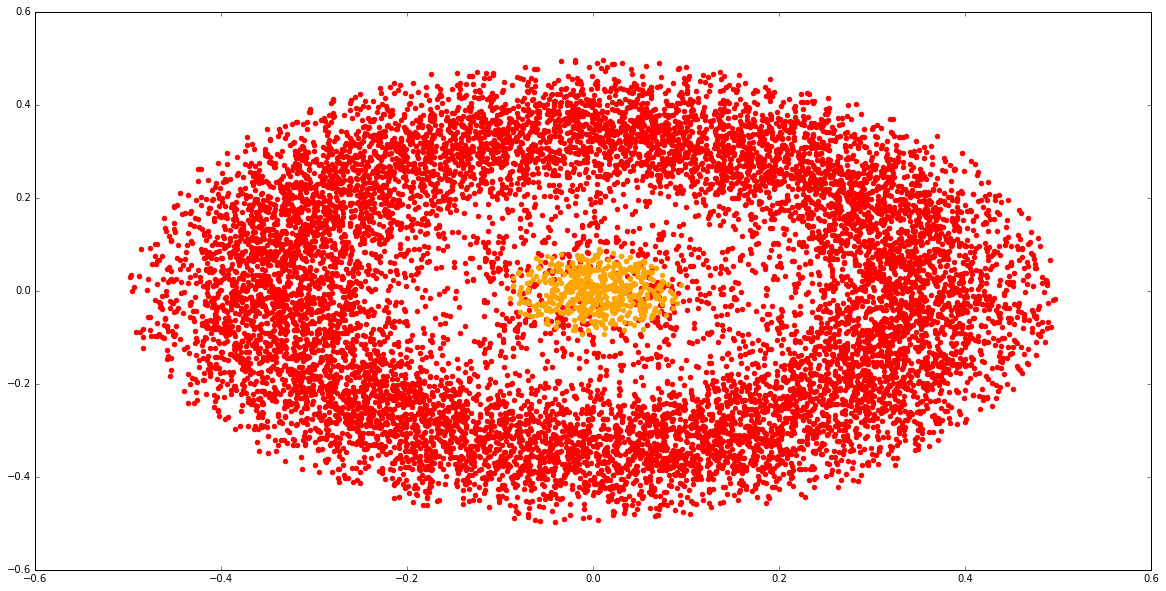

In [28]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(x_ring[y_ring[:]==0][:,0],x_ring[y_ring[:]==0][:,1],color='red')
plt.scatter(x_ring[y_ring[:]==1][:,0],x_ring[y_ring[:]==1][:,1],color='orange')
#plt.scatter(data[data[:,0]==1][:,1],data[data[:,0]==1][:,2],color='orange')

In [42]:
cf = ens.AdaBoostClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)
cf = ens.AdaBoostClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)
cf = ens.AdaBoostClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

0.996899689969
0.996899689969
0.996899689969


In [43]:
cf = ens.RandomForestClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.RandomForestClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.RandomForestClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)

0.999649964996
0.999899989999
0.999849984998


In [44]:
cf = ens.GradientBoostingClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.GradientBoostingClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.GradientBoostingClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)

0.996499649965
0.996499649965
0.99504950495


In [13]:
auc=np.zeros(100)
for i in range(100):
    cf = ens.AdaBoostClassifier(n_estimators=(i+1)*10)
    cf.fit(train[:,1:],train[:,0])
    pred = cf.decision_function(test[:,1:])
    auc[i] = met.roc_auc_score(test[:,0],pred)

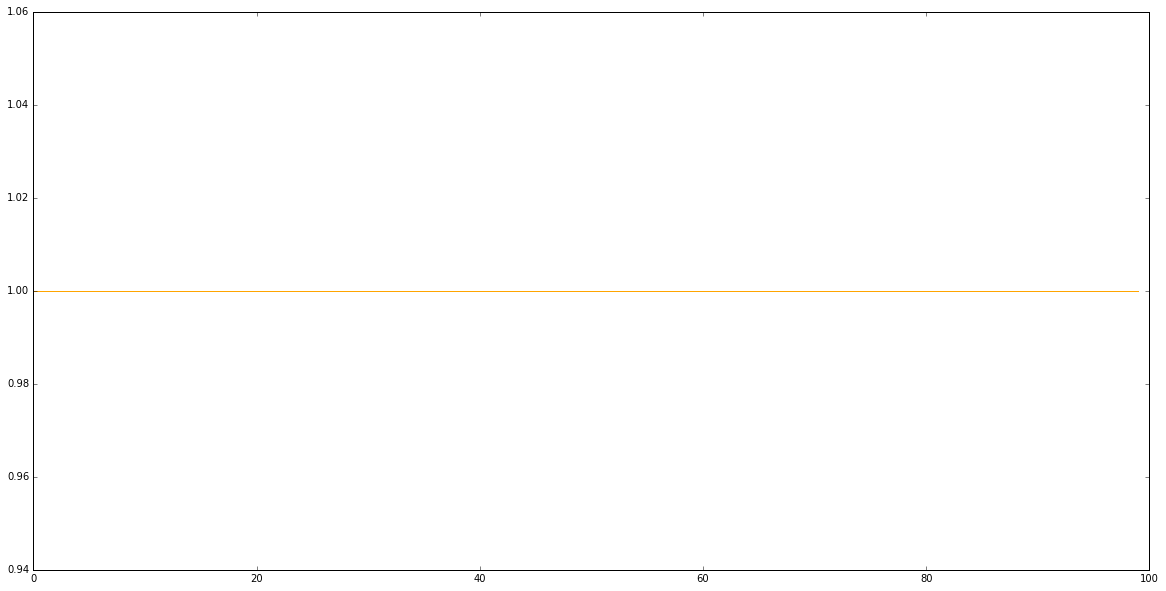

In [14]:
plt.figure(figsize=(20,10),dpi=300)
plt.plot(auc,color='orange')
plt.show()